In [4]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from process import *
from datetime import timedelta
from sklearn.metrics import confusion_matrix


In [5]:
df_filt = pd.read_csv('df_raw.csv')
df_test = pd.read_csv('df_test.csv')   
df_filt['Timestamp'] = pd.to_datetime(df_filt['Timestamp'])
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp'])

df_filt.shape

(1675002, 32)

In [6]:
features_filt = features_tsfel(df_filt, w_size=100, w_overlap=0, t_time=timedelta(microseconds=10000), n_jobs=6)

In [7]:
features_test = features_tsfel(df_test, w_size=100, w_overlap=0, t_time=timedelta(microseconds=10000), n_jobs=6)

In [ ]:
features_filt_50 = features_tsfel(df_filt, w_size=100, w_overlap=0.5, t_time=timedelta(microseconds=5000), n_jobs=6)

In [ ]:
features_test_50 = features_tsfel(df_test, w_size=100, w_overlap=0.5, t_time=timedelta(microseconds=5000), n_jobs=6)

In [ ]:
print(features_filt.shape)

(576, 56)


Acurácia: 0.4103
              precision    recall  f1-score   support

  body shake       0.00      0.00      0.00         4
  lying down       0.00      0.00      0.00         0
     sitting       0.00      0.00      0.00       220
    standing       0.96      0.77      0.86       127
     walking       0.95      1.00      0.97        78

    accuracy                           0.41       429
   macro avg       0.38      0.35      0.37       429
weighted avg       0.46      0.41      0.43       429



c:\Users\julia\.vscode\PIBIC\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\julia\.vscode\PIBIC\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\julia\.vscode\PIBIC\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Use

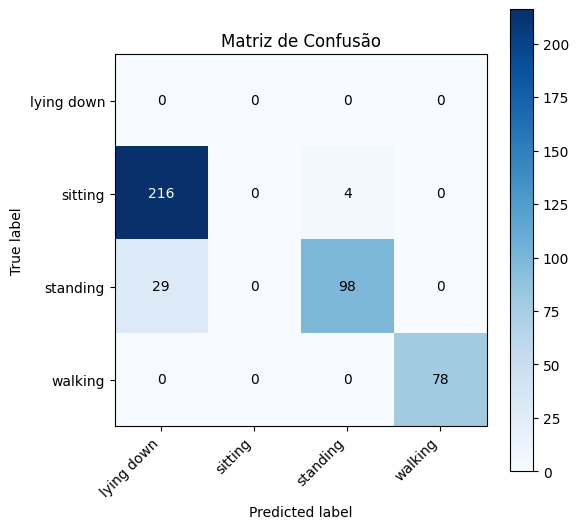

In [ ]:
#============================== RANDOM FOREST SEM OVERLAP ===============================

x_treino = features_filt.drop(columns=["Position", "Subject"])
y_treino = features_filt["Position"]
x_teste = features_test.drop(columns=["Position", "Subject"])
y_teste = features_test["Position"]

rf = RandomForestClassifier(
    n_estimators=300,        # número de árvores
    max_depth=12,          # deixe None inicialmente
    min_samples_split=2,
    min_samples_leaf=1,     # padrão bom para classificação
    bootstrap=True,
    n_jobs=6,
    random_state=42
)

rf.fit(x_treino, y_treino)
y_pred = rf.predict(x_teste)

acc = accuracy_score(y_teste, y_pred)
print(f"Acurácia: {acc:.4f}")

print(classification_report(y_teste, y_pred))

labels = list(rf.classes_)
cm = confusion_matrix(y_teste, y_pred, labels=labels)
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(len(labels)), yticks=np.arange(len(labels)), xticklabels=labels, yticklabels=labels, ylabel='True label', xlabel='Predicted label', title='Matriz de Confusão')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')
plt.show()

Acurácia: 0.3863
              precision    recall  f1-score   support

  body shake       0.00      0.00      0.00         6
  lying down       0.00      0.00      0.00         0
     sitting       0.00      0.00      0.00       436
    standing       0.95      0.70      0.81       252
     walking       0.96      1.00      0.98       150

    accuracy                           0.39       844
   macro avg       0.38      0.34      0.36       844
weighted avg       0.45      0.39      0.41       844



c:\Users\julia\.vscode\PIBIC\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\julia\.vscode\PIBIC\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\julia\.vscode\PIBIC\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Use

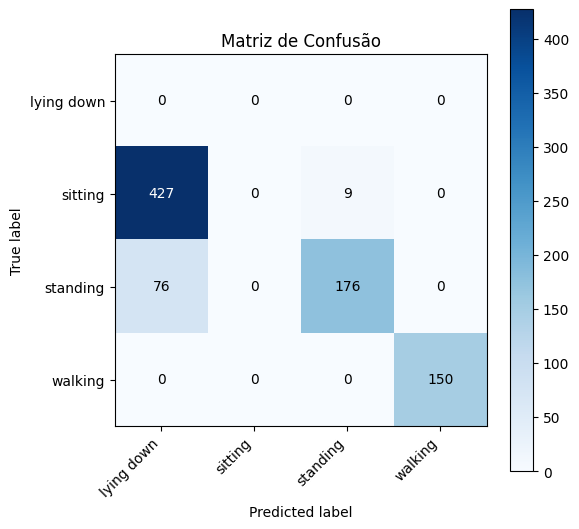

In [ ]:
#============================== RANDOM FOREST COM OVERLAP ===============================

x_treino = features_filt_50.drop(columns=["Position", "Subject"])
y_treino = features_filt_50["Position"]
x_teste = features_test_50.drop(columns=["Position", "Subject"])
y_teste = features_test_50["Position"]

rf = RandomForestClassifier(
    n_estimators=300,        # número de árvores
    max_depth=12,          # deixe None inicialmente
    min_samples_split=2,
    min_samples_leaf=1,     # padrão bom para classificação
    bootstrap=True,
    n_jobs=6,
    random_state=42
)

rf.fit(x_treino, y_treino)
y_pred = rf.predict(x_teste)

acc = accuracy_score(y_teste, y_pred)
print(f"Acurácia: {acc:.4f}")
print(classification_report(y_teste, y_pred))
labels = list(rf.classes_)
cm = confusion_matrix(y_teste, y_pred, labels=labels)
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(len(labels)), yticks=np.arange(len(labels)), xticklabels=labels, yticklabels=labels, ylabel='True label', xlabel='Predicted label', title='Matriz de Confusão')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')
plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
Melhor acurácia média (CV): 0.9331071428571429
Acurácia no teste: 0.3791
              precision    recall  f1-score   support

  body shake       0.00      0.00      0.00         6
  lying down       0.00      0.00      0.00         0
     sitting       0.00      0.00      0.00       436
    standing       0.93      0.68      0.79       252
     walking       0.96      0.99      0.98       150

    accuracy                           0.38       844
   macro avg       0.38      0.33      0.35       844
weighted avg       0.45      0.38      0.41       844



c:\Users\julia\.vscode\PIBIC\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\julia\.vscode\PIBIC\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\julia\.vscode\PIBIC\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Use

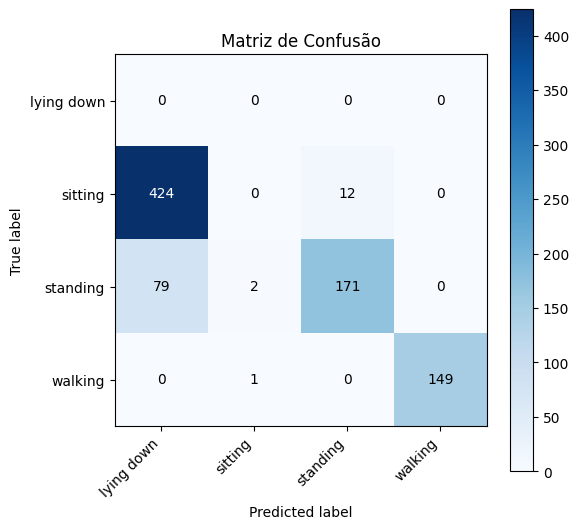

In [ ]:
# Definindo os hiperparâmetros para Grid Search (3 valores para cada)
param_grid = {
    'n_estimators': [100, 200],           # número de árvores
    'max_depth': [10, 15 ],                # profundidade máxima
    'min_samples_leaf': [1, 2, 5]         # mínimo de amostras por folha
}

# Criando o modelo base ( serão sobrescritos pelo GridSearch)
rf_base = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    n_jobs=6,
    random_state=42
)

# Grid Search com StratifiedKFold para manter proporção de classes em cada fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=6,
    verbose=2,
    return_train_score=True,
    refit=True
)

# Ajustar o Grid Search no conjunto de treino
grid_search.fit(x_treino, y_treino)

# Resultados
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia média (CV):", grid_search.best_score_)

# Avaliar o melhor estimador no conjunto de teste
rf_best = grid_search.best_estimator_
y_pred = rf_best.predict(x_teste)
acc = accuracy_score(y_teste, y_pred)
print(f"Acurácia no teste: {acc:.4f}")
print(classification_report(y_teste, y_pred))
labels = list(rf_best.classes_)
cm = confusion_matrix(y_teste, y_pred, labels=labels)
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(len(labels)), yticks=np.arange(len(labels)), xticklabels=labels, yticklabels=labels, ylabel='True label', xlabel='Predicted label', title='Matriz de Confusão')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')
plt.show()
